In [52]:
# Source: https://www.kaggle.com/c/nfl-big-data-bowl-2021/data

In [53]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style('darkgrid')
pd.set_option('max_columns', 100)

In [54]:
# Read CSV-file
df = pd.read_csv('../static/nfl_pass_plays_2020.csv', low_memory=False)
df.shape

(19239, 33)

In [55]:
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  
0              0  
1              0

In [56]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   gameDate                19239 non-null  object 
 2   gameTimeEastern         19239 non-null  object 
 3   homeTeamAbbr            19239 non-null  object 
 4   visitorTeamAbbr         19239 non-null  object 
 5   week                    19239 non-null  int64  
 6   gameId.1                19239 non-null  int64  
 7   playId                  19239 non-null  int64  
 8   playDescription         19239 non-null  object 
 9   quarter                 19239 non-null  int64  
 10  down                    19239 non-null  int64  
 11  yardsToGo               19239 non-null  int64  
 12  possessionTeam          19239 non-null  object 
 13  playType                19239 non-null  object 
 14  yardlineSide            18985 non-null

In [57]:
df.describe()

gameId          week      gameId.1        playId       quarter  \
count  1.923900e+04  19239.000000  1.923900e+04  19239.000000  19239.000000   
mean   2.018107e+09      8.944592  2.018107e+09   2176.217319      2.591039   
std    1.148060e+04      4.975953  1.148060e+04   1240.919041      1.123155   
min    2.018091e+09      1.000000  2.018091e+09     50.000000      1.000000   
25%    2.018100e+09      4.000000  2.018100e+09   1125.000000      2.000000   
50%    2.018110e+09      9.000000  2.018110e+09   2166.000000      3.000000   
75%    2.018120e+09     13.000000  2.018120e+09   3203.500000      4.000000   
max    2.018123e+09     17.000000  2.018123e+09   5661.000000      5.000000   

               down     yardsToGo  yardlineNumber  defendersInTheBox  \
count  19239.000000  19239.000000    19239.000000       19177.000000   
mean       1.920318      8.923905       29.860232           6.036189   
std        0.848819      3.974216       12.444118           1.015547   
min        1.000000      1.000000        1.000000           1.000000   
25%        1.000000      6.000000       21.500000           6.000000   
50%        2.000000     10.000000       30.000000           6.000000   
75%        3.000000     10.000000       40.000000           7.000000   
max        4.000000     41.000000       50.000000          11.000000   

       numberOfPassRushers  preSnapVisitorScore  preSnapHomeScore  \
count         18606.000000         18600.000000      18600.000000   
mean              4.216543            10.758333         12.465484   
std               0.897862             9.798115         10.552753   
min               0.000000             0.000000          0.000000   
25%               4.000000             3.000000          3.000000   
50%               4.000000             9.000000         10.000000   
75%               5.000000            17.000000         20.000000   
max              10.000000            51.000000         54.000000   

       absoluteYardlineNumber  offensePlayResult    playResult           epa  \
count            18600.000000       19239.000000  19239.000000  19239.000000   
mean                59.905753           6.279380      6.469047      0.020725   
std                 23.641588          10.184296     10.566605      1.580748   
min                 11.000000         -19.000000    -78.000000    -11.935951   
25%                 40.000000           0.000000      0.000000     -0.745327   
50%                 60.000000           4.000000      4.000000     -0.190540   
75%                 80.000000          10.000000     11.000000      0.976822   
max                109.000000          97.000000     97.000000      8.629316   

       isDefensivePI  
count   19239.000000  
mean        0.013462  
std         0.115246  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

## Missing Data

In [58]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values().to_frame("Number of missing values")

Number of missing values
passResult                                     2
personnelO                                    29
personnelD                                    29
defendersInTheBox                             62
offenseFormation                             141
yardlineSide                                 254
numberOfPassRushers                          633
typeDropback                                 639
preSnapVisitorScore                          639
preSnapHomeScore                             639
gameClock                                    639
absoluteYardlineNumber                       639
penaltyCodes                               18033
penaltyJerseyNumbers                       18033

In [59]:
# Delete rows with missing data
df.dropna(subset=['passResult', 'defendersInTheBox', 'offenseFormation', 'yardlineSide', 'absoluteYardlineNumber', 'numberOfPassRushers', 'typeDropback'], inplace=True)
df.shape

(18263, 33)

In [60]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values().to_frame("Number of missing values")

Number of missing values
penaltyCodes                             17698
penaltyJerseyNumbers                     17698

## Dataset Enhancemet

In [61]:
# Create field to show if the Offense is on the own half (yes=1, no=0)
df['OFF_own_half'] = df['yardlineSide'] == df['possessionTeam']
df['OFF_own_half'].replace(to_replace=[False, True], value=[0,1], inplace=True)
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  
0              0             1  
1              0             0

In [62]:
# Create field to show if the possession team is the Home Team
df['possession_home_team'] = df['possessionTeam'] == df['homeTeamAbbr']
df['possession_home_team'].replace(to_replace=[False, True], value=[0,1], inplace=True)
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  possession_home_team  
0              0             1                     0  
1              0             0                     0

In [63]:
# Create field to show the points of the possessionTeam vs. the defending Team
own_points = []
against_points = []

for i in range(0, len(df)):
    if df.iloc[i]['possession_home_team'] == 1:
        own_points.append(df.iloc[i]['preSnapHomeScore'])
        against_points.append(df.iloc[i]['preSnapVisitorScore'])
    
    if df.iloc[i]['possession_home_team'] == 0:
        own_points.append(df.iloc[i]['preSnapVisitorScore'])
        against_points.append(df.iloc[i]['preSnapHomeScore'])
    
df['possessionTeamPoints'] = own_points
df['defenseTeamPoints'] = against_points
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  possession_home_team  possessionTeamPoints  \
0              0             1                     0                   0.0   
1              0             0                     0                   0.0   

   defenseTeamPoints  
0                0.0  
1                0.0

In [64]:
# calculate the target variable (1st Down yes/no)
df['net_gain'] = -df['yardsToGo'] + df['offensePlayResult']
df['new1st_down'] = [1 if i>=0 else 0 for i in df['net_gain']]
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  possession_home_team  possessionTeamPoints  \
0              0             1                     0                   0.0   
1              0             0                     0                   0.0   

   defenseTeamPoints  net_gain  new1st_down  
0                0.0        -5            0  
1                0.0       -10            0

In [65]:
# Get Offense Personnel
running_backs = []
tight_ends = []
wide_receivers = []

count_rb = 0
count_te = 0
count_wr = 0

for positions in df['personnelO']:
    pos_list = positions.split(",") # pos_list[0] -> RB, pos_list[1] -> TE, pos_list[2] -> TE
    for position in pos_list:
        if " RB" in position:
            running_backs.append(int(position.replace(" RB", "")))
            count_rb+=1
        
        if " TE" in position:
            tight_ends.append(int(position.replace(" TE", "")))
            count_te+=1
            
        if " WR" in position:
            wide_receivers.append(int(position.replace(" WR", "")))
            count_wr+=1

print("RB: ", count_rb)
print("TE: ", count_te)
print("WR: ", count_wr)

RB:  18263
TE:  18263
WR:  18263


In [66]:
df['RUNNING_BACKS'] = running_backs
df['TIGHT_ENDS'] = tight_ends
df['WIDE_RECEIVERS'] = wide_receivers
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  possession_home_team  possessionTeamPoints  \
0              0             1                     0                   0.0   
1              0             0                     0                   0.0   

   defenseTeamPoints  net_gain  new1st_down  RUNNING_BACKS  TIGHT_ENDS  \
0                0.0        -5            0              2           1   
1                0.0       -10            0              1           1   

   WIDE_RECEIVERS  
0               2  
1               3

In [67]:
# Get Defense Personnel
DL = []
LB = []
DB = []

count_dl = 0
count_lb = 0
count_db = 0

for positions in df['personnelD']:
    pos_list = positions.split(",")
    for position in pos_list:
        if " DL" in position:
            DL.append(int(position.replace(" DL", "")))
            count_dl+=1
        
        if " LB" in position:
            LB.append(int(position.replace(" LB", "")))
            count_lb+=1
            
        if " DB" in position:
            DB.append(int(position.replace(" DB", "")))
            count_db+=1

print("DL: ", count_dl)
print("LB: ", count_lb)
print("DB: ", count_db)

DL:  18263
LB:  18263
DB:  18263


In [68]:
df['DL'] = DL
df['LB'] = LB
df['DB'] = DB
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  possession_home_team  possessionTeamPoints  \
0              0             1                     0                   0.0   
1              0             0                     0                   0.0   

   defenseTeamPoints  net_gain  new1st_down  RUNNING_BACKS  TIGHT_ENDS  \
0                0.0        -5            0              2           1   
1                0.0       -10            0              1           1   

   WIDE_RECEIVERS  DL  LB  DB  
0               2   4   2   5  
1               3   4   2   5

In [69]:
from datetime import datetime

def min_to_sec(timestring):
    pt = datetime.strptime(timestring,'%M:%S:%f')
    total_seconds = pt.second + pt.minute*60 + pt.microsecond / 1000000
    return total_seconds

# Convert times
secs = []
for i in range(0, len(df)):
    sec = min_to_sec(df.iloc[i]["gameClock"])
    secs.append(sec)

df["gameClockSecs"] = secs
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  possession_home_team  possessionTeamPoints  \
0              0             1                     0                   0.0   
1              0             0                     0                   0.0   

   defenseTeamPoints  net_gain  new1st_down  RUNNING_BACKS  TIGHT_ENDS  \
0                0.0        -5            0              2           1   
1                0.0       -10            0              1           1   

   WIDE_RECEIVERS  DL  LB  DB  gameClockSecs  
0               2   4   2   5          900.0  
1               3   4   2   5          790.0

## Data Analysis

In [70]:
# Plays per Offense Formation
df['offenseFormation'].value_counts().to_frame('Number of plays')

Number of plays
SHOTGUN               12062
SINGLEBACK             2676
EMPTY                  2327
I_FORM                  878
PISTOL                  237
JUMBO                    48
WILDCAT                  35

In [71]:
a = df[['offenseFormation', 'new1st_down']].copy()
a['count'] = 1
group = a.groupby(['offenseFormation', 'new1st_down'], as_index=False).sum()
pivot = group.pivot(index='offenseFormation', columns='new1st_down')
pivot

count      
new1st_down          0     1
offenseFormation            
EMPTY             1559   768
I_FORM             530   348
JUMBO               27    21
PISTOL             148    89
SHOTGUN           8225  3837
SINGLEBACK        1634  1042
WILDCAT             26     9

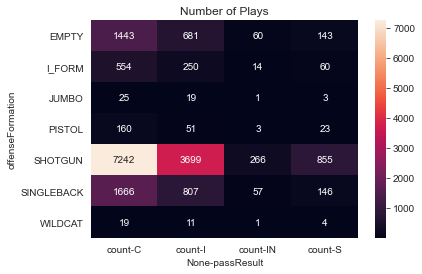

In [72]:
a = df[['offenseFormation', 'passResult']].copy()
a['count'] = 1
group = a.groupby(['offenseFormation', 'passResult'], as_index=False).sum()
pivot = group.pivot(index='offenseFormation', columns='passResult')
sns.heatmap(pivot, annot=True, fmt='g')
plt.title('Number of Plays');

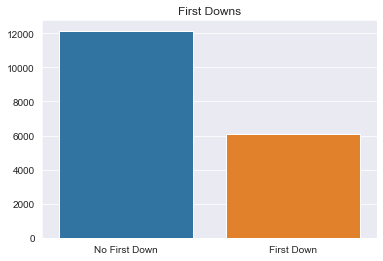

In [73]:
no_first_down = df[['new1st_down']].groupby(['new1st_down']).size().iloc[0]
first_down = df[['new1st_down']].groupby(['new1st_down']).size().iloc[1]
sns.barplot(x=['No First Down', 'First Down'], y=[no_first_down, first_down])
plt.title("First Downs");

In [74]:
null_prediction_rate = first_down / (no_first_down + first_down)
print("First Down: ", null_prediction_rate)
print("No First Down: ", 1-null_prediction_rate)

First Down:  0.3347752286042819
No First Down:  0.6652247713957181


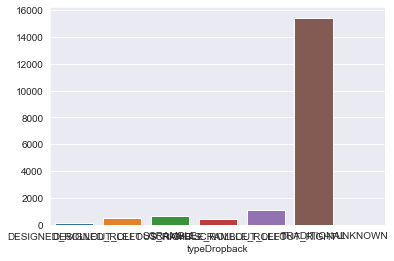

In [75]:
dropouts = df[['typeDropback']].groupby(['typeDropback']).size()
sns.barplot(x=dropouts.index, y=dropouts.values);

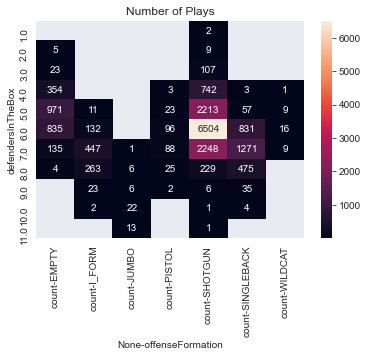

In [76]:
a = df[['offenseFormation', 'defendersInTheBox']].copy()
a['count'] = 1
group = a.groupby(['offenseFormation', 'defendersInTheBox'], as_index=False).sum()
group['count'] = group['count']
pivot = group.pivot(index='defendersInTheBox', columns='offenseFormation')
sns.heatmap(pivot, annot=True, fmt='g')
plt.title('Number of Plays');

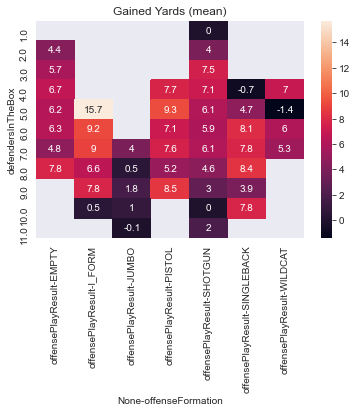

In [77]:
# Offense Formations vs. DefendersInTheBox and the gained Yards (mean)
a = df[['offensePlayResult', 'offenseFormation', 'defendersInTheBox']]
group = a.groupby(['offenseFormation', 'defendersInTheBox'], as_index=False).mean()
group['offensePlayResult'] = round(group['offensePlayResult'], 1)
pivot = group.pivot(index='defendersInTheBox', columns='offenseFormation')
sns.heatmap(pivot, annot=True, fmt='g')
plt.title('Gained Yards (mean)');

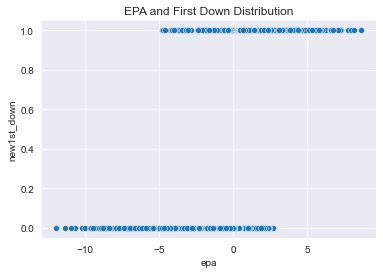

In [78]:
sns.scatterplot(x=df['epa'], y=df['new1st_down'])
plt.title("EPA and First Down Distribution");

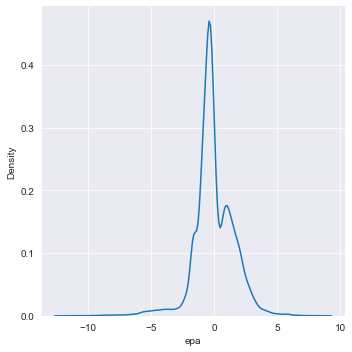

In [79]:
sns.displot(df['epa'], kind="kde");

## Feature Engineering

In [80]:
offense_dummy = pd.get_dummies(df['offenseFormation'])

offense_dummy['OF_OTHER'] = offense_dummy['I_FORM'] + offense_dummy['JUMBO'] + offense_dummy['PISTOL'] + offense_dummy['WILDCAT']
offense_dummy.drop(columns=['I_FORM', 'JUMBO', 'PISTOL', 'WILDCAT'], inplace=True)
print(offense_dummy.head(3))

df = pd.concat([df, offense_dummy], axis=1)

   EMPTY  SHOTGUN  SINGLEBACK  OF_OTHER
0      0        0           0         1
1      0        0           1         0
2      0        1           0         0


In [81]:
dropback_dummy = pd.get_dummies(df['typeDropback'])

dropback_dummy['DROPBACK_OTHER'] = dropback_dummy['DESIGNED_ROLLOUT_LEFT'] + dropback_dummy['DESIGNED_ROLLOUT_RIGHT'] + dropback_dummy['SCRAMBLE'] + dropback_dummy['SCRAMBLE_ROLLOUT_LEFT'] + dropback_dummy['SCRAMBLE_ROLLOUT_RIGHT'] + + dropback_dummy['UNKNOWN']
dropback_dummy.drop(columns=['DESIGNED_ROLLOUT_LEFT', 'DESIGNED_ROLLOUT_RIGHT', 'SCRAMBLE', 'SCRAMBLE_ROLLOUT_LEFT', 'SCRAMBLE_ROLLOUT_RIGHT', 'UNKNOWN'], inplace=True)
print(dropback_dummy.head(3))

df = pd.concat([df, dropback_dummy], axis=1)

   TRADITIONAL  DROPBACK_OTHER
0            1               0
1            1               0
2            1               0


In [82]:
# Exclude Plays with penalties
df = df[df['penaltyCodes'].isnull()]
df.head(2)

gameId    gameDate gameTimeEastern homeTeamAbbr visitorTeamAbbr  week  \
0  2018090600  09/06/2018        20:20:00          PHI             ATL     1   
1  2018090600  09/06/2018        20:20:00          PHI             ATL     1   

     gameId.1  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   

   yardlineNumber offenseFormation        personnelO  defendersInTheBox  \
0              20           I_FORM  2 RB, 1 TE, 2 WR                7.0   
1              39       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0   

   numberOfPassRushers        personnelD typeDropback  preSnapVisitorScore  \
0                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   
1                  4.0  4 DL, 2 LB, 5 DB  TRADITIONAL                  0.0   

   preSnapHomeScore gameClock  absoluteYardlineNumber penaltyCodes  \
0               0.0  15:00:00                    90.0          NaN   
1               0.0  13:10:00                    49.0          NaN   

  penaltyJerseyNumbers passResult  offensePlayResult  playResult       epa  \
0                  NaN          C                 10          10  0.261827   
1                  NaN          I                  0           0 -0.372360   

   isDefensivePI  OFF_own_half  possession_home_team  possessionTeamPoints  \
0              0             1                     0                   0.0   
1              0             0                     0                   0.0   

   defenseTeamPoints  net_gain  new1st_down  RUNNING_BACKS  TIGHT_ENDS  \
0                0.0        -5            0              2           1   
1                0.0       -10            0              1           1   

   WIDE_RECEIVERS  DL  LB  DB  gameClockSecs  EMPTY  SHOTGUN  SINGLEBACK  \
0               2   4   2   5          900.0      0        0           0   
1               3   4   2   5          790.0      0        0           1   

   OF_OTHER  TRADITIONAL  DROPBACK_OTHER  
0         1            1               0  
1         0            1               0

## Feature Selection

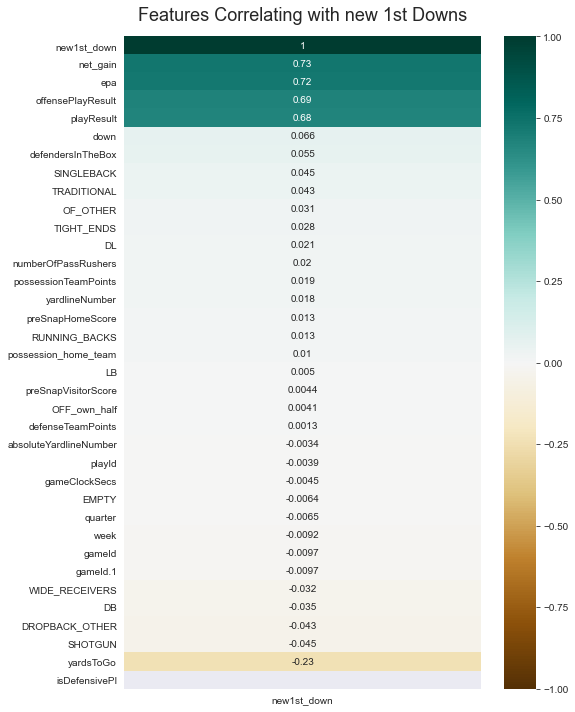

In [98]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['new1st_down']].sort_values(by='new1st_down', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with new 1st Downs', fontdict={'fontsize':18}, pad=16);

In [99]:
# Create list of features to be considered in the ML model
features = ['quarter', 'down', 'yardsToGo', 'yardlineNumber', 'OFF_own_half', 'defendersInTheBox',
            'gameClockSecs',
            'possessionTeamPoints', 'defenseTeamPoints',
            'RUNNING_BACKS', 'TIGHT_ENDS', 'WIDE_RECEIVERS',
            'DL', 'LB', 'DB',
            'EMPTY', 'SHOTGUN', 'SINGLEBACK',
            'epa',
            'new1st_down']

In [100]:
# features = ['epa', 'new1st_down']

In [101]:
data = df[features].copy()
data.head(2)

quarter  down  yardsToGo  yardlineNumber  OFF_own_half  defendersInTheBox  \
0        1     1         15              20             1                7.0   
1        1     1         10              39             0                7.0   

   gameClockSecs  possessionTeamPoints  defenseTeamPoints  RUNNING_BACKS  \
0          900.0                   0.0                0.0              2   
1          790.0                   0.0                0.0              1   

   TIGHT_ENDS  WIDE_RECEIVERS  DL  LB  DB  EMPTY  SHOTGUN  SINGLEBACK  \
0           1               2   4   2   5      0        0           0   
1           1               3   4   2   5      0        0           1   

        epa  new1st_down  
0  0.261827            0  
1 -0.372360            0

## Feature Transformation

In [102]:
# Create feature and target dataset
X_data = data.drop(columns=['new1st_down'], axis=1).values # delete target column
y_data = data['new1st_down'].values # select target column
X_data[:1]

array([[1.00000000e+00, 1.00000000e+00, 1.50000000e+01, 2.00000000e+01,
        1.00000000e+00, 7.00000000e+00, 9.00000000e+02, 0.00000000e+00,
        0.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        4.00000000e+00, 2.00000000e+00, 5.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.61827272e-01]])

In [103]:
# Create train & test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=0)
print("number of test samples :", X_test.shape[0])
print("number of training samples:", X_train.shape[0])

number of test samples : 4425
number of training samples: 13273


In [104]:
X_train[:1]

array([[  4.        ,   1.        ,  10.        ,  25.        ,
          1.        ,   5.        , 346.        ,   7.        ,
         29.        ,   1.        ,   1.        ,   3.        ,
          3.        ,   2.        ,   6.        ,   0.        ,
          1.        ,   0.        ,  -0.46428373]])

In [105]:
# Apply feature scaling to normalize data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(float))
X_test = scaler.transform(X_test.astype(float))
X_train[:1]

array([[ 1.25586264, -1.0782682 ,  0.26640033, -0.37435455,  0.8568115 ,
        -1.02104221, -0.24349131, -0.34004429,  1.43784845, -0.21573525,
        -0.35832133,  0.45030049, -0.34425589, -0.73706296,  1.4557352 ,
        -0.37846874,  0.71523356, -0.41586172, -0.28621424]])

## ML Models

In [106]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#### Decision Tree Grid Search

In [107]:
# Train & Test Decision Tree
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
p = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
     'class_weight': ['balanced', None]}

k = 5

clm_tree = GridSearchCV(decision_tree, p, cv = k)
clm_tree.fit(X_train, y_train)
pd.DataFrame(clm_tree.cv_results_).sort_values(by = ['rank_test_score']).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
62       0.046624      0.009625         0.001475        0.000256   
26       0.030483      0.002084         0.000945        0.000030   

   param_class_weight param_criterion param_max_depth param_splitter  \
62               None         entropy               6           best   
26           balanced         entropy               6           best   

                                               params  split0_test_score  \
62  {'class_weight': None, 'criterion': 'entropy',...           0.992467   
26  {'class_weight': 'balanced', 'criterion': 'ent...           0.993220   

    split1_test_score  split2_test_score  split3_test_score  \
62           0.996234           0.995480           0.989827   
26           0.994727           0.994727           0.987943   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
62           0.994348         0.993671        0.002303                1  
26           0.995102         0.993144        0.002680                2

In [108]:
yhat_tree = clm_tree.predict(X_test)
accuracy_tree = metrics.accuracy_score(yhat_tree, y_test)
print(f'Accuracy of the model: {round(accuracy_tree, 4)}')

Accuracy of the model: 0.9914


#### Logistic Regression

In [109]:
# Train & Test Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X_train, y_train)
yhat_LR = LR.predict(X_test)
accuracy_LR = metrics.accuracy_score(yhat_LR, y_test)

print(f'Accuracy of the model: {round(accuracy_LR, 4)}')

Accuracy of the model: 0.9912


## Eval Graph

In [110]:
# Create an Evaluation Function for both models
from sklearn import metrics
def evaluation(yhat, y_test):
    print('+++ Model Evaluation Report +++')
    print(f'Accuracy-Score: {metrics.accuracy_score(yhat, y_test)}')
    print('CONFUSION MATRIX')
    plt.figure(figsize=(8,3))
    sns.heatmap(metrics.confusion_matrix(y_test, yhat), annot=True, fmt='g')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values');

+++ Model Evaluation Report +++
Accuracy-Score: 0.991412429378531
CONFUSION MATRIX


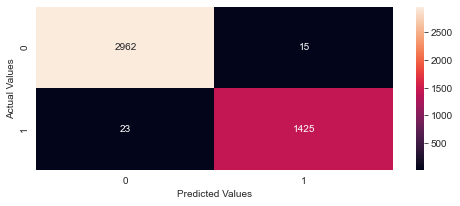

In [111]:
evaluation(yhat_tree, y_test)

+++ Model Evaluation Report +++
Accuracy-Score: 0.9911864406779661
CONFUSION MATRIX


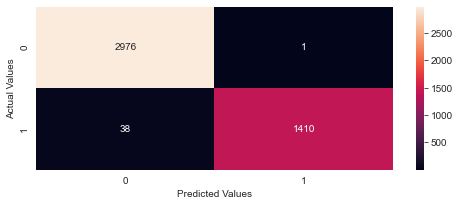

In [112]:
evaluation(yhat_LR, y_test)